In [22]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

import numpy as np
import imageio

Populating the interactive namespace from numpy and matplotlib


In [55]:
TeapotLightPositions = np.array([
    [ 0.0, -1.0,  1.0],
    [ 1.0,  1.0,  1.0],
    [-1.0,  1.0,  1.0]
])

TeapotLightImagePaths = [
    './2_photometricstereo/teapot_0_-1_1.png',
    './2_photometricstereo/teapot_1_1_1.png',
    './2_photometricstereo/teapot_-1_1_1.png'
]

TeapotLightImages = map(lambda path: imageio.imread(path)[:, :, 0], TeapotCameraImagePaths)

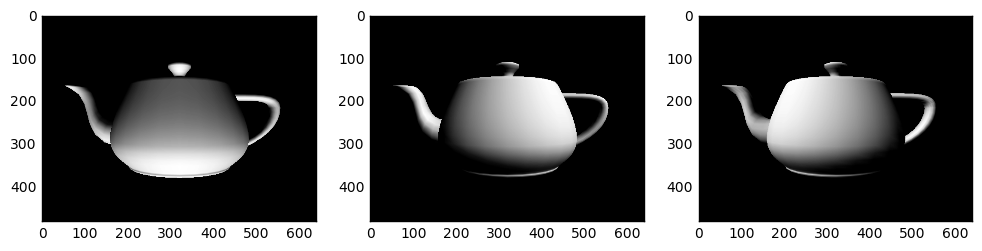

In [61]:
Intensities = np.empty(shape=(TeapotLightImages[0].shape[0], TeapotLightImages[0].shape[1], 3))
for Index, Image in enumerate(TeapotLightImages):
    subplot(1, 3, Index + 1)
    imshow(Image, cmap='gray')
    Intensities[:, :, Index] = Image

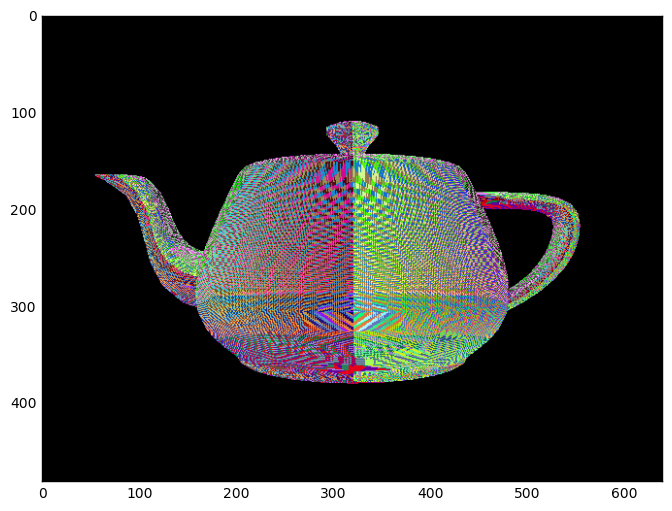

In [134]:
InvertedLightDirection = np.linalg.inv(TeapotCameraPositions)
IntensityPoints = np.vstack(Intensities)
TeapotNormals = np.dot(InvertedLightDirection, IntensityPoints.T).T.reshape(Intensities.shape)

def plotNormals(Normals):
    NormalImage = np.empty(Normals.shape)
    MaxZ = np.amax(Normals[:, :, 2])
    MinZ = np.amin(Normals[:, :, 2])
    
    NormalImage[:, :, 0] = (Normals[:, :, 1] - MinZ / (MaxZ - MinZ))
    NormalImage[:, :, 1] = (Normals[:, :, 0] - MinZ / (MaxZ - MinZ))
    NormalImage[:, :, 2] = (Normals[:, :, 2] - MinZ / (MaxZ - MinZ))
    
    imshow(NormalImage)
plotNormals(TeapotNormals)